## Data Loading and Initial Exploration:


In [804]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

data = pd.read_csv("data/Melbourne_housing.csv")
data.head()

C:\Users\Keith\AppData\Local\Temp\ipykernel_22140\3815656794.py:9: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/Melbourne_housing.csv")


Suburb           Address  Rooms Type Method        SellerG      Date  \
0    Abbotsford     68 Studley St      2    h     SS         Jellis  3/9/2016   
1  Airport West     154 Halsey Rd      3    t     PI         Nelson  3/9/2016   
2   Albert Park    105 Kerferd Rd      2    h      S  hockingstuart  3/9/2016   
3   Albert Park  85 Richardson St      2    h      S        Thomson  3/9/2016   
4    Alphington      30 Austin St      3    h     SN        McGrath  3/9/2016   

   Distance  Postcode  Bedroom  ...  Landsize  BuildingArea  YearBuilt  \
0       2.5    3067.0      2.0  ...     126.0           inf        NaN   
1      13.5    3042.0      3.0  ...     303.0           225     2016.0   
2       3.3    3206.0      2.0  ...     120.0            82     1900.0   
3       3.3    3206.0      2.0  ...     159.0           inf        NaN   
4       6.4    3078.0      3.0  ...     174.0           122     2003.0   

                  CouncilArea  Latitude Longtitude             Regionname  \
0          Yarra City Council  -37.8014   144.9958  Northern Metropolitan   
1  Moonee Valley City Council  -37.7180   144.8780   Western Metropolitan   
2   Port Phillip City Council  -37.8459   144.9555  Southern Metropolitan   
3   Port Phillip City Council  -37.8450   144.9538  Southern Metropolitan   
4        Darebin City Council  -37.7818   145.0198  Northern Metropolitan   

   Propertycount      ParkingArea      Price  
0         4019.0          Carport        NaN  
1         3464.0  Detached Garage   840000.0  
2         3280.0  Attached Garage  1275000.0  
3         3280.0           Indoor  1455000.0  
4         2211.0          Parkade        NaN  

[5 rows x 22 columns]

In [805]:
data.shape

(34857, 22)

From data.shape we can see that there are 34857 rows and 22 columns

In [806]:
data.size

766854

We can see that there is a total of 766854 cells in the table.

In [807]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom        26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13760 non-null  object 
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Latitude       26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

In [808]:
data.describe()

Rooms      Distance      Postcode       Bedroom      Bathroom  \
count  34857.000000  34856.000000  34856.000000  26640.000000  26631.000000   
mean       3.031012     11.184929   3116.062859      3.084647      1.624798   
std        0.969933      6.788892    109.023903      0.980690      0.724212   
min        1.000000      0.000000   3000.000000      0.000000      0.000000   
25%        2.000000      6.400000   3051.000000      2.000000      1.000000   
50%        3.000000     10.300000   3103.000000      3.000000      2.000000   
75%        4.000000     14.000000   3156.000000      4.000000      2.000000   
max       16.000000     48.100000   3978.000000     30.000000     12.000000   

                Car       Landsize     YearBuilt      Latitude    Longtitude  \
count  26129.000000   23047.000000  15551.000000  26881.000000  26881.000000   
mean       1.728845     593.598993   1965.289885    -37.810634    145.001851   
std        1.010771    3398.841946     37.328178      0.090279      0.120169   
min        0.000000       0.000000   1196.000000    -38.190430    144.423790   
25%        1.000000     224.000000   1940.000000    -37.862950    144.933500   
50%        2.000000     521.000000   1970.000000    -37.807600    145.007800   
75%        2.000000     670.000000   2000.000000    -37.754100    145.071900   
max       26.000000  433014.000000   2106.000000    -37.390200    145.526350   

       Propertycount         Price  
count   34854.000000  2.724700e+04  
mean     7572.888306  1.050173e+06  
std      4428.090313  6.414671e+05  
min        83.000000  8.500000e+04  
25%      4385.000000  6.350000e+05  
50%      6763.000000  8.700000e+05  
75%     10412.000000  1.295000e+06  
max     21650.000000  1.120000e+07

In [809]:
data.transpose()

0                           1      \
Suburb                    Abbotsford                Airport West   
Address                68 Studley St               154 Halsey Rd   
Rooms                              2                           3   
Type                               h                           t   
Method                            SS                          PI   
SellerG                       Jellis                      Nelson   
Date                        3/9/2016                    3/9/2016   
Distance                         2.5                        13.5   
Postcode                      3067.0                      3042.0   
Bedroom                          2.0                         3.0   
Bathroom                         1.0                         2.0   
Car                              1.0                         1.0   
Landsize                       126.0                       303.0   
BuildingArea                     inf                         225   
YearBuilt                        NaN                      2016.0   
CouncilArea       Yarra City Council  Moonee Valley City Council   
Latitude                    -37.8014                     -37.718   
Longtitude                  144.9958                     144.878   
Regionname     Northern Metropolitan        Western Metropolitan   
Propertycount                 4019.0                      3464.0   
ParkingArea                  Carport             Detached Garage   
Price                            NaN                    840000.0   

                                   2                          3      \
Suburb                       Albert Park                Albert Park   
Address                   105 Kerferd Rd           85 Richardson St   
Rooms                                  2                          2   
Type                                   h                          h   
Method                                 S                          S   
SellerG                    hockingstuart                    Thomson   
Date                            3/9/2016                   3/9/2016   
Distance                             3.3                        3.3   
Postcode                          3206.0                     3206.0   
Bedroom                              2.0                        2.0   
Bathroom                             1.0                        1.0   
Car                                  0.0                        0.0   
Landsize                           120.0                      159.0   
BuildingArea                          82                        inf   
YearBuilt                         1900.0                        NaN   
CouncilArea    Port Phillip City Council  Port Phillip City Council   
Latitude                        -37.8459                    -37.845   
Longtitude                      144.9555                   144.9538   
Regionname         Southern Metropolitan      Southern Metropolitan   
Propertycount                     3280.0                     3280.0   
ParkingArea              Attached Garage                     Indoor   
Price                          1275000.0                  1455000.0   

                               4                      5      \
Suburb                    Alphington             Alphington   
Address                 30 Austin St             6 Smith St   
Rooms                              3                      4   
Type                               h                      h   
Method                            SN                      S   
SellerG                      McGrath                  Brace   
Date                        3/9/2016               3/9/2016   
Distance                         6.4                    6.4   
Postcode                      3078.0                 3078.0   
Bedroom                          3.0                    3.0   
Bathroom                         2.0                    2.0   
Car                              1.0                    4.0   
Landsize     

# Below is some information on the Price feature


In [810]:
data["Price"].describe()

count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

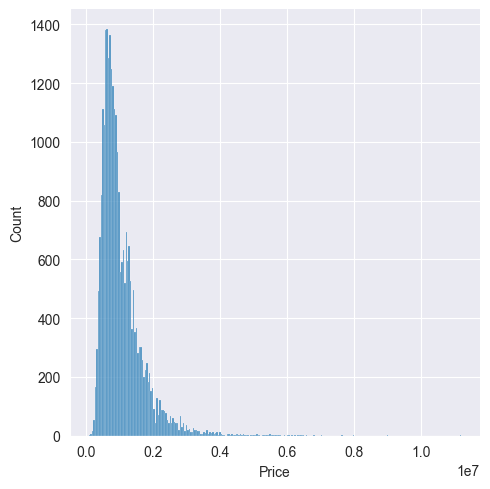

In [811]:
sns.displot(data['Price'])
plt.show()

From the above graph above we can see that there is a higher distribution of lower price listings than higher priced. Using descirbe we can also see some information about the destribution of prices. The highest price being 11.2 million and the lowest at 85000. We can see from both the graph and .describe output that there is a high standard deviation, this is likely due to outliers on the high end of the price range, thus increasing the mean.

In [812]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom        26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13760 non-null  object 
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Latitude       26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

The BuildingArea column being of type Object was causing me many issues when creating graphs, so I decided to convert it to numerical data as it should be. I did the same for ParkingArea

I converted the remaining objects to categorical values for easier use

In [813]:
data["BuildingArea"] = pd.to_numeric(data["BuildingArea"],errors='coerce')

In [814]:
# Covert objects to categorical variables
change_objects = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']
for colname in change_objects:
    data[colname] = data[colname].astype('category')  

# Check it worked
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Method         34857 non-null  category
 5   SellerG        34857 non-null  category
 6   Date           34857 non-null  object  
 7   Distance       34856 non-null  float64 
 8   Postcode       34856 non-null  float64 
 9   Bedroom        26640 non-null  float64 
 10  Bathroom       26631 non-null  float64 
 11  Car            26129 non-null  float64 
 12  Landsize       23047 non-null  float64 
 13  BuildingArea   13749 non-null  float64 
 14  YearBuilt      15551 non-null  float64 
 15  CouncilArea    34854 non-null  category
 16  Latitude       26881 non-null  float64 
 17  Longtitude     26881 non-null  

In [815]:
data.shape

(34857, 22)

Above we can see the data type of each feature in the Dtype column, we can also see the count of not null. Since we know there are 34857 rows, the field which have a lower value than this must have missing data, such as the BuildingArea field for example, at 13760.

Below we can see the sum of cells with missing/null values, followed by a percentage of each feature which is missing/null.


In [816]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21108
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

In [817]:
# Percentage of Missings in each columns
data.isnull().sum()/len(data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom          23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.555986
YearBuilt        55.386293
CouncilArea       0.008607
Latitude         22.882061
Longtitude       22.882061
Regionname        0.000000
Propertycount     0.008607
ParkingArea       0.000000
Price            21.832057
dtype: float64

The missing data should be dealt with

## Exploratory Data Analysis

Some Data visualization

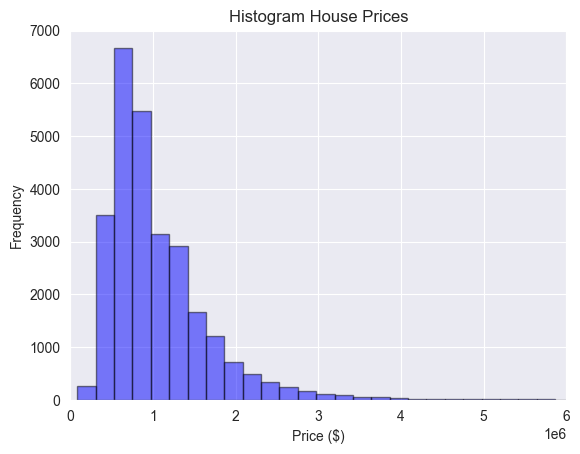

In [818]:
# Build Histogram to visualise price distribution
num_bins = 50
n, bins, patches = plt.hist(data.Price, num_bins, color='b', alpha=0.5, histtype = 'bar', ec = 'black')
plt.ylabel ('Frequency')
plt.xlabel ('Price ($)')
plt.xlim([0, 6000000])
plt.title ('Histogram House Prices')
plt.show()

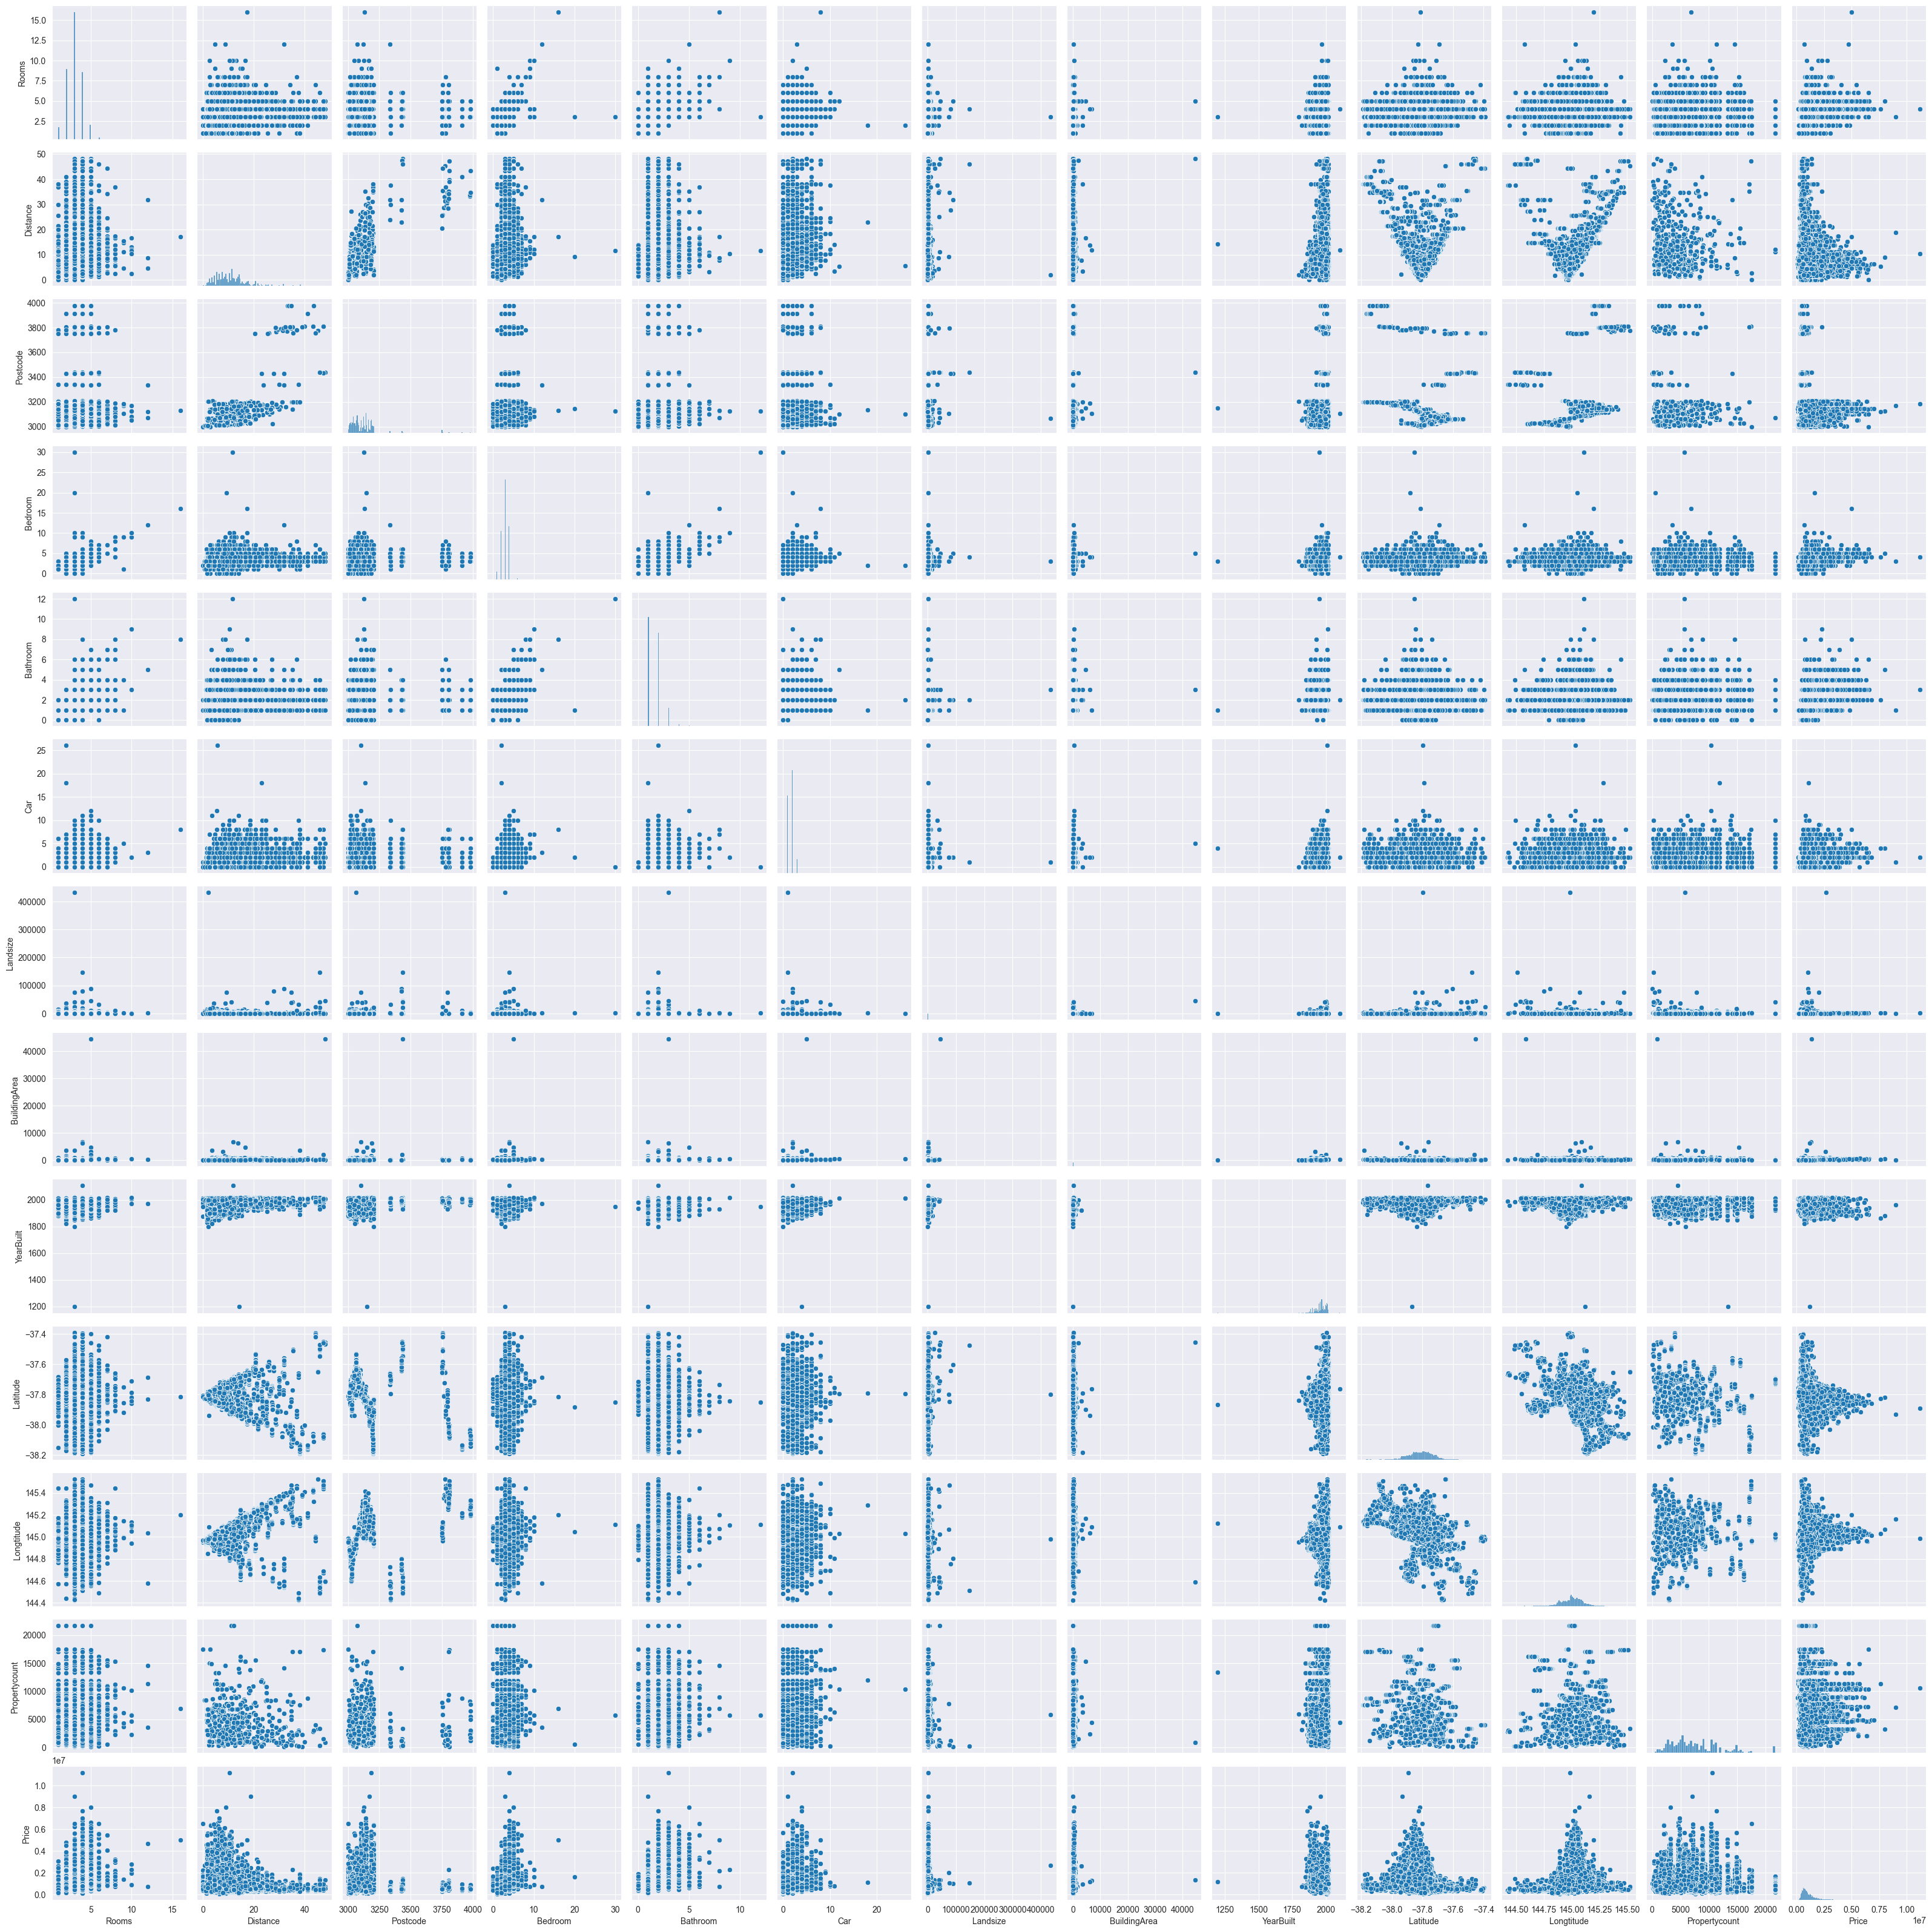

In [819]:
sns.pairplot(data)   

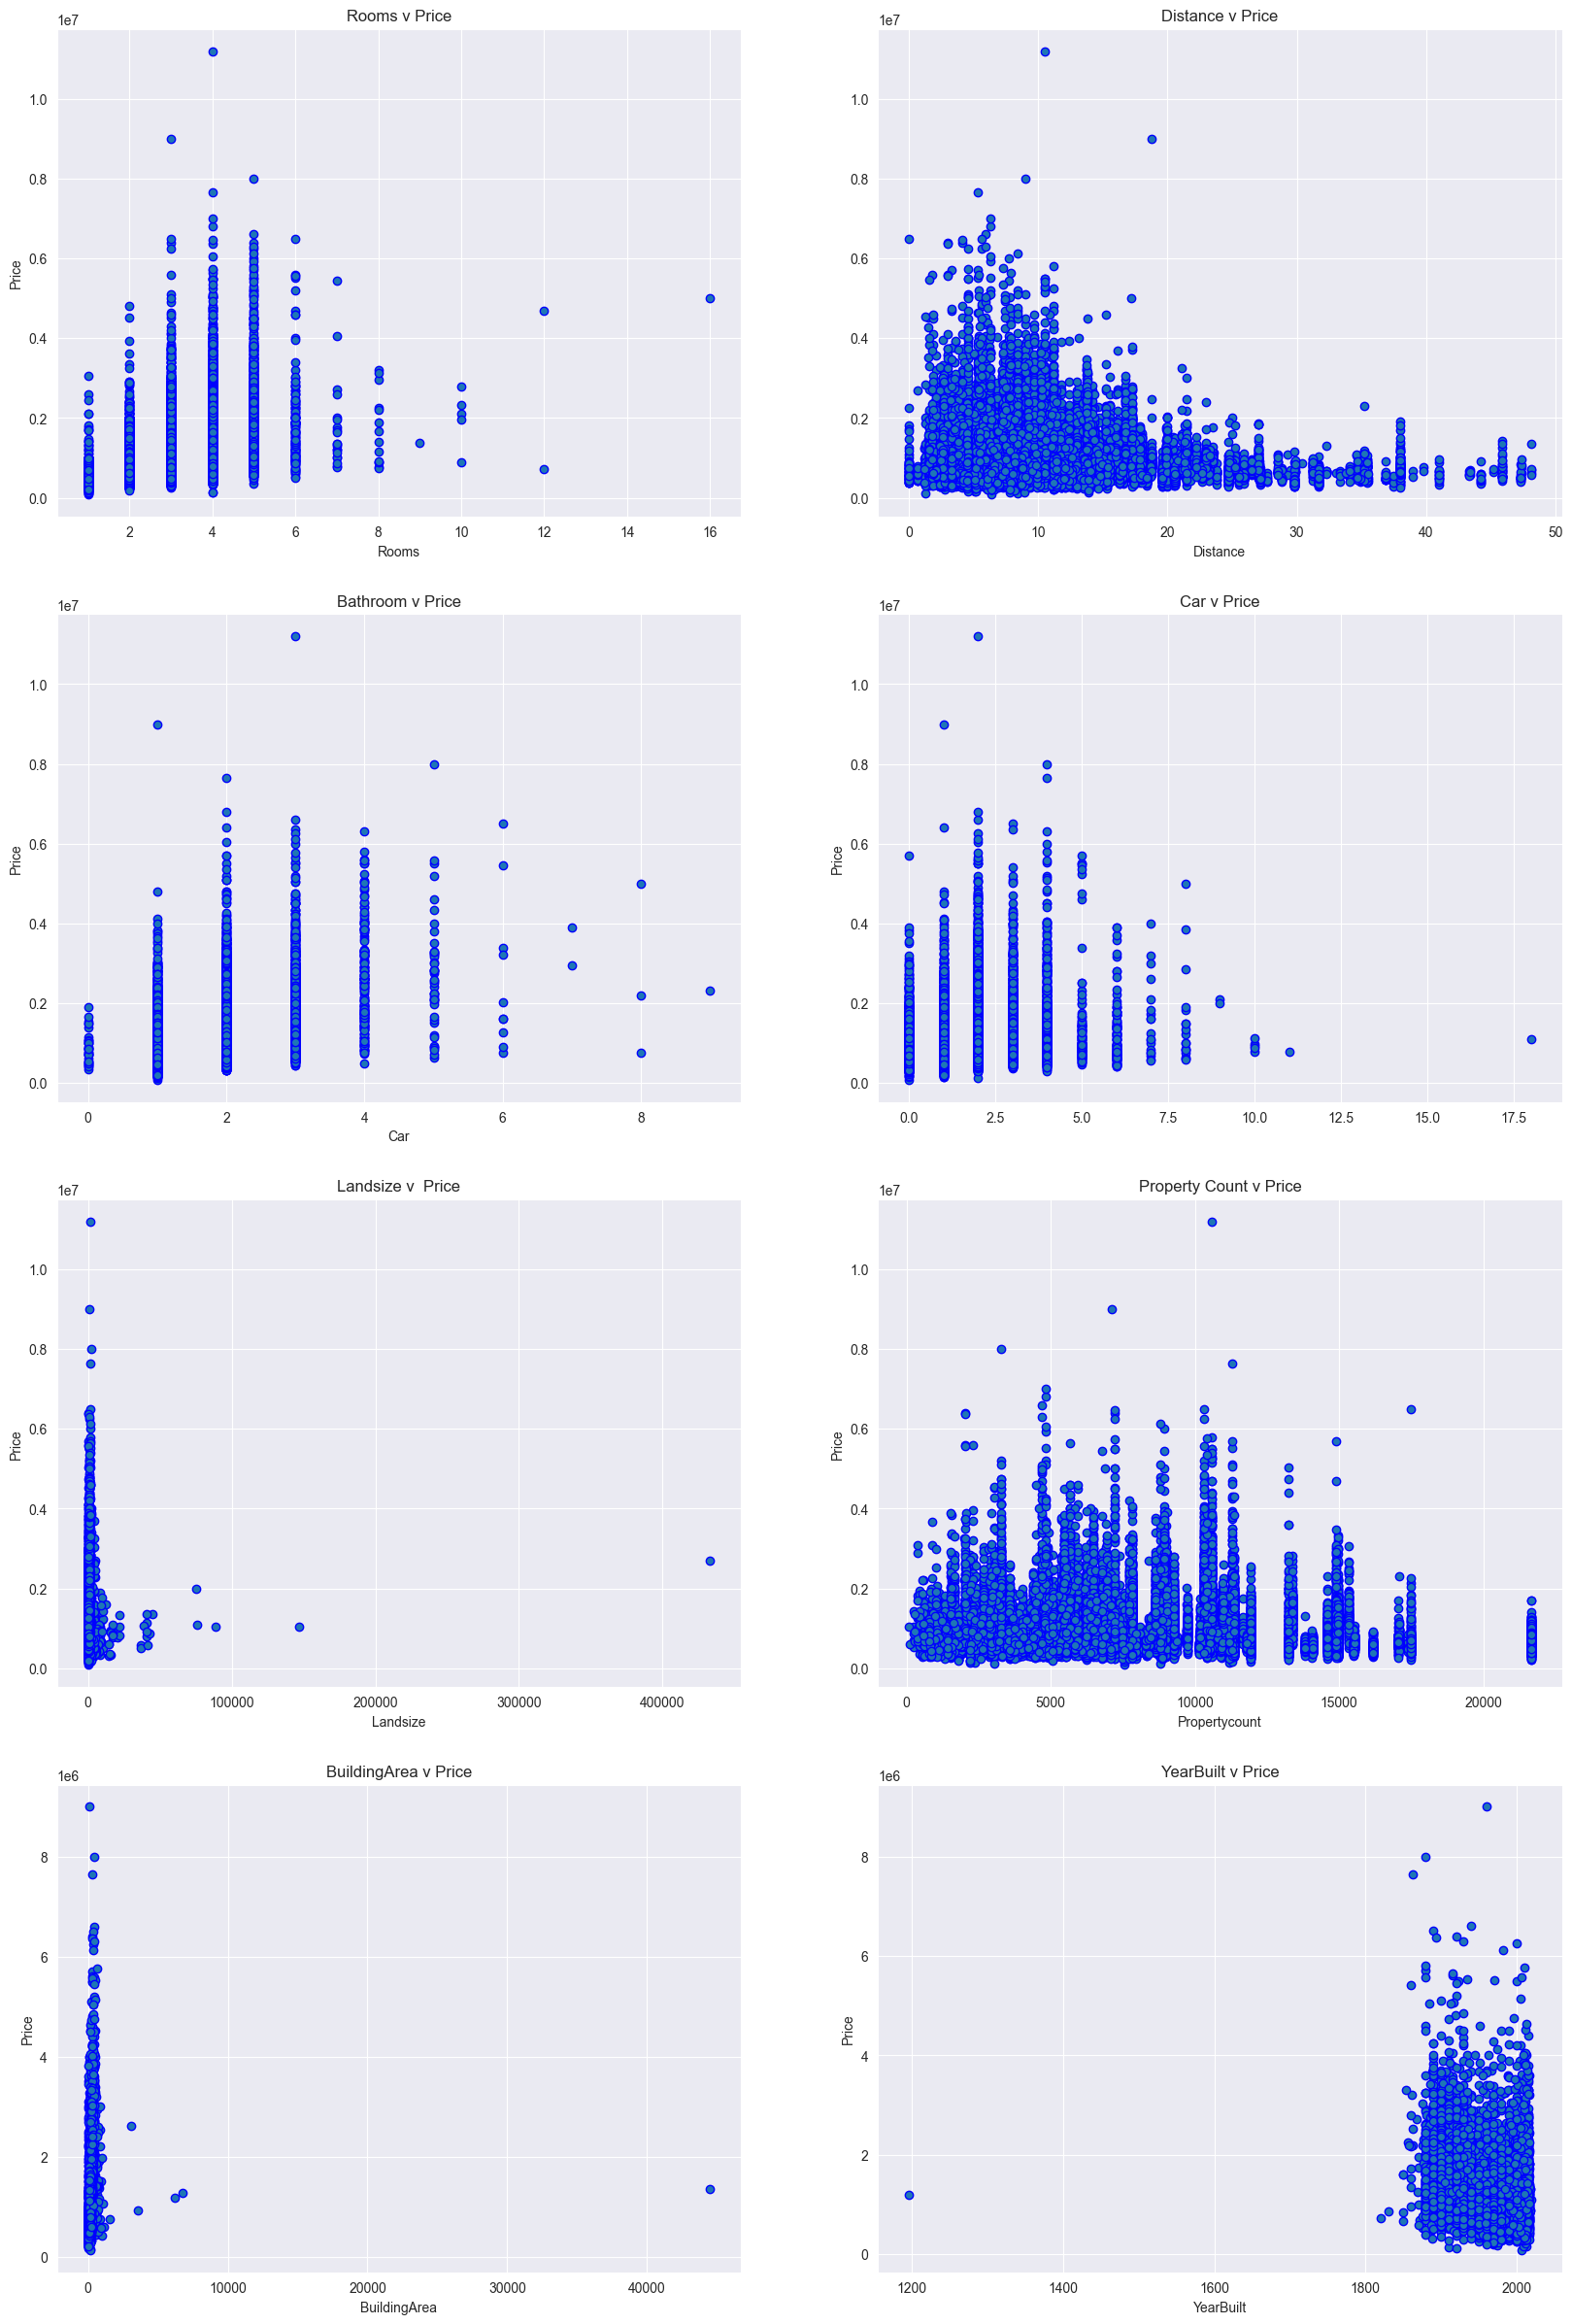

In [820]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = data, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = data, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')
# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = data, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'Propertycount', y = 'Price', data = data, edgecolor = 'b')
axes[2,1].set_xlabel('Propertycount')
axes[2,1].set_ylabel('Price')
axes[2,1].set_title('Property Count v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'BuildingArea', y = 'Price', data = data, edgecolor = 'b')
axes[3,0].set_xlabel('BuildingArea')
axes[3,0].set_ylabel('Price')
axes[3,0].set_title('BuildingArea v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'YearBuilt', y = 'Price', data = data, edgecolor = 'b')
axes[3,1].set_xlabel('YearBuilt')
axes[3,1].set_ylabel('Price')
axes[3,1].set_title('YearBuilt v Price')

plt.show()

The above graphs have helped to indentify a number of outliers in the data. For example a row has a date set at 1200 for its YearBuilt.

Text(0.5, 1.0, 'Correlation')

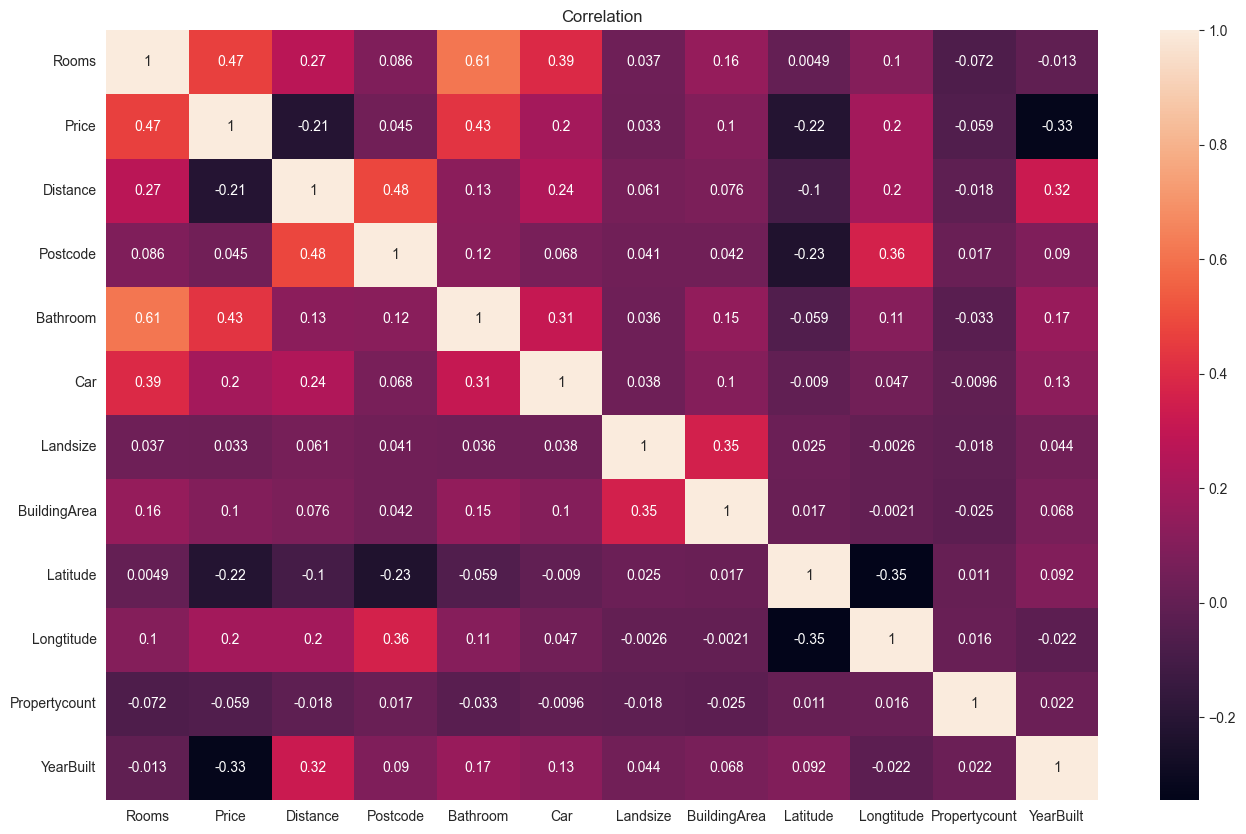

In [821]:
# Correlation Inspection
plt.figure(figsize=(16,10))
sns.heatmap(data[['Rooms','Price','Distance','Postcode','Bathroom','Car','Landsize','BuildingArea','Latitude','Longtitude','Propertycount','YearBuilt']].corr(), annot= True)
plt.title('Correlation')

Below are some graphs for categorical data. I removed the graphs for SellerG and address as I found the data not useful. For address, each property has its own so a frequency table will just return 1s and for SellerG a majority of sellers were of count 1 so again not very useful.

Frequency table for Suburb
col_0         Count
Suburb             
Abbotsford      137
Aberfeldie       80
Airport West    162
Albanvale        14
Albert Park     131
...             ...
Yallambie        50
Yarra Glen        1
Yarraville      304
croydon           1
viewbank          1

[351 rows x 1 columns]




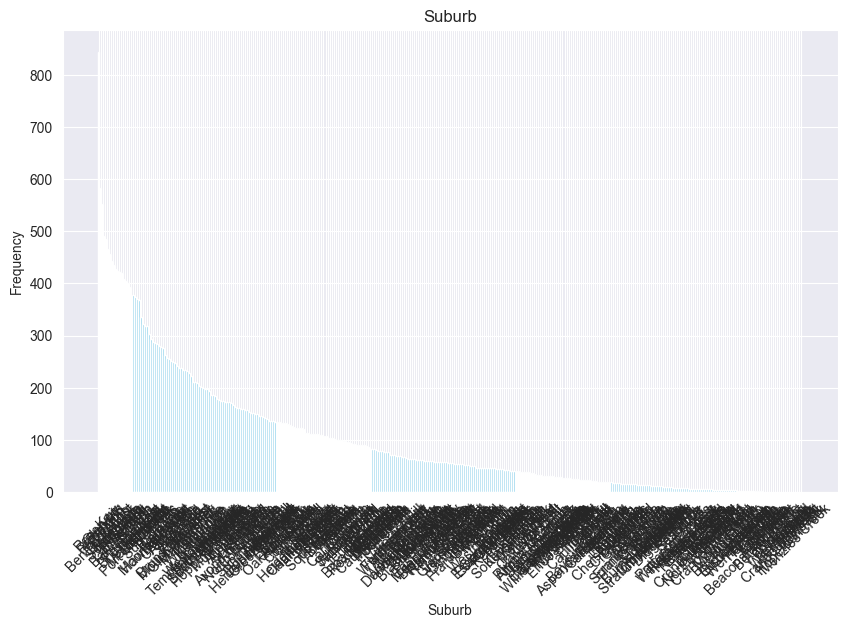

Frequency table for Type
col_0  Count
Type        
h      23980
t       3580
u       7297




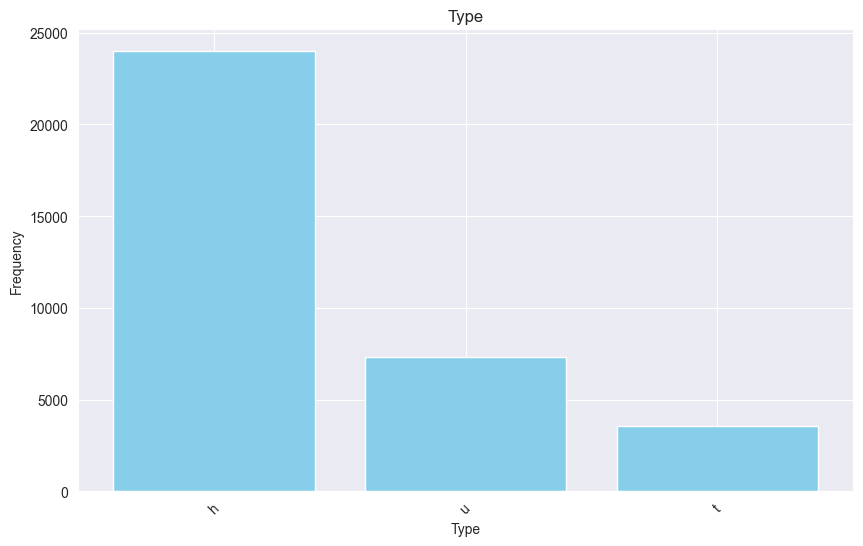

Frequency table for Method
col_0   Count
Method       
PI       4850
PN        308
S       19744
SA        226
SN       1317
SP       5095
SS         36
VB       3108
W         173




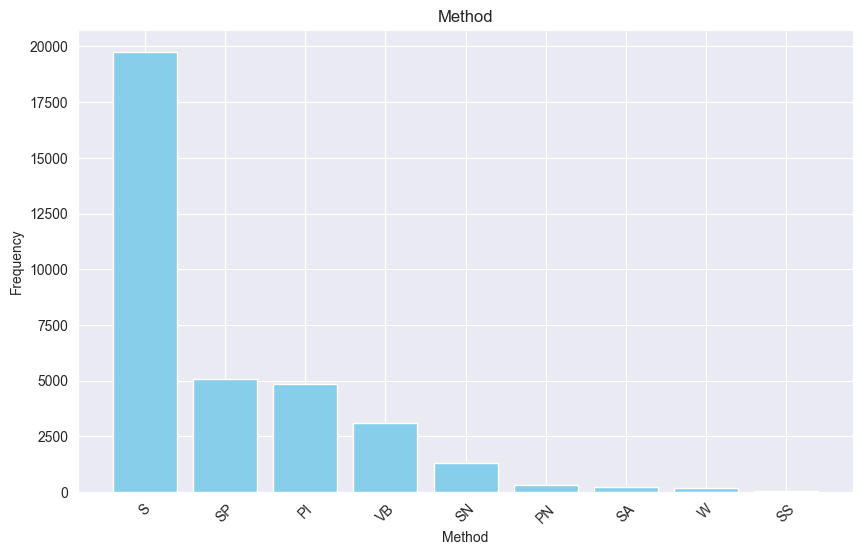

Frequency table for CouncilArea
col_0                           Count
CouncilArea                          
Banyule City Council             1861
Bayside City Council             1764
Boroondara City Council          3675
Brimbank City Council            1593
Cardinia Shire Council             41
Casey City Council                176
Darebin City Council             2851
Frankston City Council            290
Glen Eira City Council           2006
Greater Dandenong City Council    314
Hobsons Bay City Council          942
Hume City Council                1214
Kingston City Council             871
Knox City Council                 371
Macedon Ranges Shire Council       46
Manningham City Council          1046
Maribyrnong City Council         1451
Maroondah City Council            506
Melbourne City Council           1952
Melton City Council               292
Mitchell Shire Council             20
Monash City Council              1466
Moonee Valley City Council       1791
Moorabool Shire Co

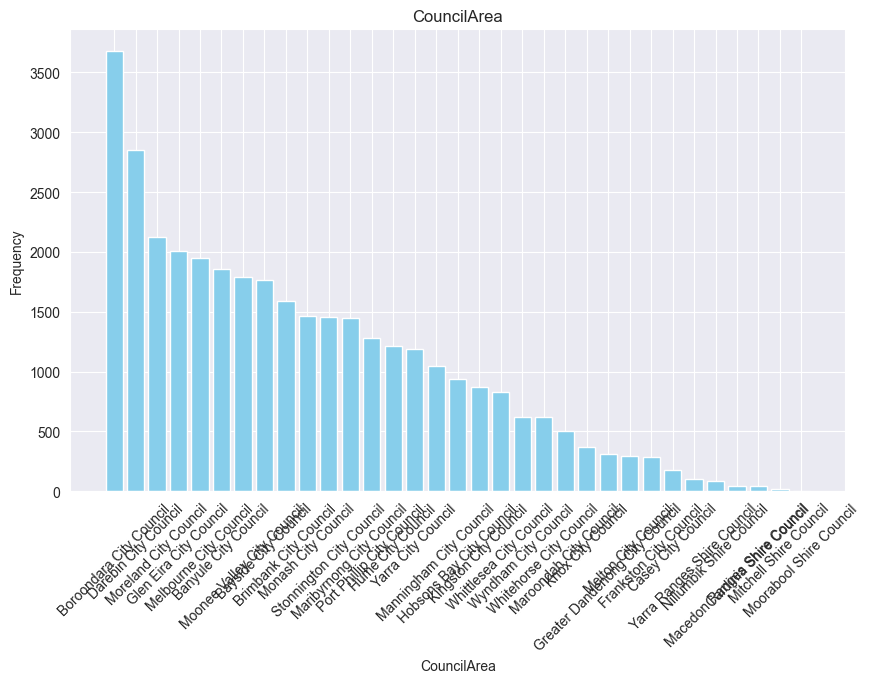

Frequency table for Regionname
col_0                       Count
Regionname                       
Eastern Metropolitan         4377
Eastern Victoria              228
Northern Metropolitan        9560
Northern Victoria             203
South-Eastern Metropolitan   1739
Southern Metropolitan       11836
Western Metropolitan         6799
Western Victoria              115




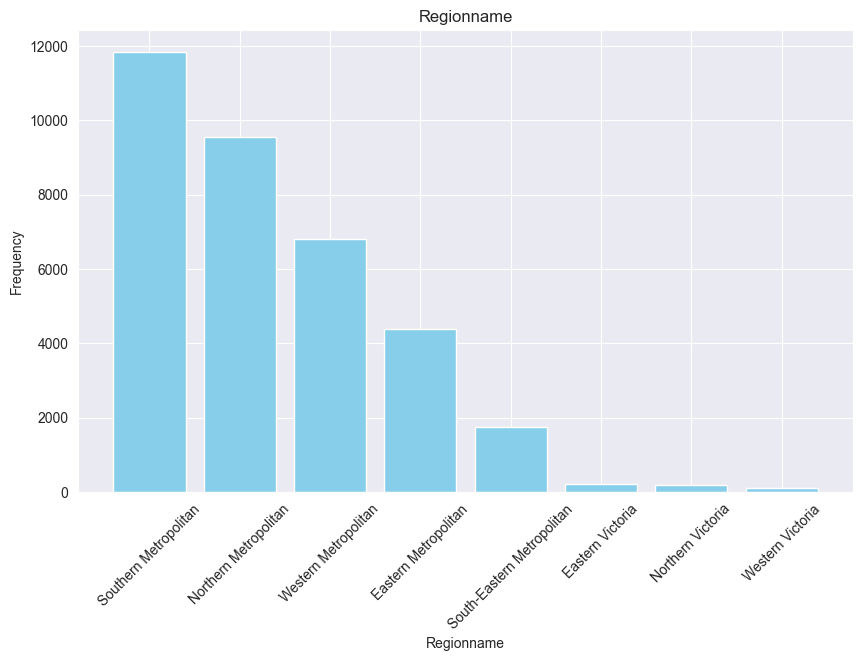

Frequency table for ParkingArea
col_0            Count
ParkingArea           
Attached Garage   6243
Carport           6243
Detached Garage   6243
Indoor            5722
Outdoor Stall     2081
Parkade           4682
Parking Pad       1041
Underground       2602




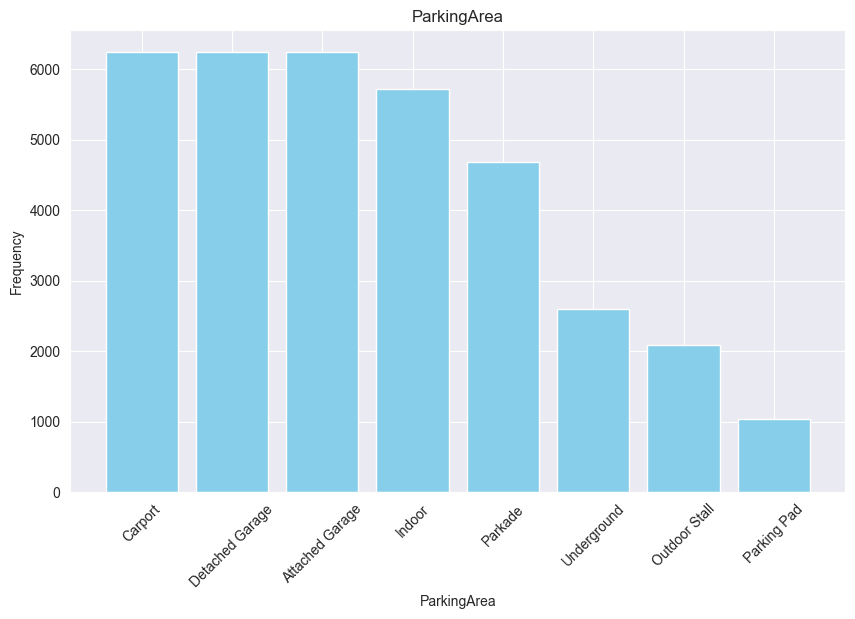

Frequency table for Postcode
col_0     Count
Postcode       
3000.0      204
3002.0       59
3003.0       66
3006.0       76
3008.0       16
...         ...
3910.0       18
3975.0        2
3976.0        7
3977.0       33
3978.0        5

[211 rows x 1 columns]




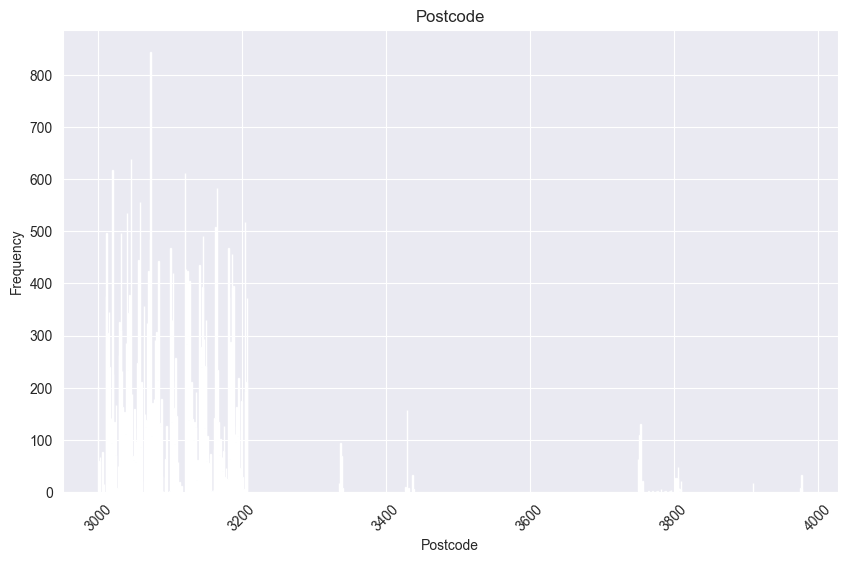

In [822]:
cat_vars = ['Suburb', 'Type','Method','CouncilArea','Regionname','ParkingArea','Postcode']
for cat in cat_vars:
    #Frequency Tables
    freq_table = pd.crosstab(data[cat], 'Count')
    print(f"Frequency table for {cat}")
    print(freq_table)
    print('\n')
    #Bar Plots
    frequency = data[cat].value_counts()
    plt.figure(figsize=(10, 6))
    plt.bar(frequency.index, frequency.values, color='skyblue')
    plt.xlabel(cat)
    plt.ylabel('Frequency')
    plt.title(f'{cat}')
    plt.xticks(rotation=45)
    plt.show()



# Discussing outliers

The graphs above to a great job of finding outliers in the data. I found the price v (other feature) graphs particularrly useful for highlighting outliers in the data set. Such outliers firstly stretch the graph making it more difficult to visualize the rest of the dataset effectively. They also can affect the measures of features, like mean, median, standard deviation ect. I mentioned previously an outlier which I thought particularry odd, that being the 1200 YearBuilt. Since this is a dataset on housing in Melbourne, a city which wasn't settled until 1835 I assume that some outlier data like this example was entered incorrectly.

# Feature Engineering

### Dealing with Outliers
Below I will remove some outliers from the dataset using the Inter Quartile Range and removing data outside of it. The features which I felt needed outliers to be removed were Price, Landsize, Rooms, Car and BuildingArea I showed a before and after boxplot for each feature. For YearBuilt I decided to remove all listing before 1835 as these are invalid due to Melbournes founding date.

In [823]:
data.shape

(34857, 22)

In [824]:
feature_list = ['Price','BuildingArea','Car','Landsize','Rooms']
for feature in feature_list:
    # IQR
    # Calculate the upper and lower limits
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    outliers = data[(data[feature] < lower) | (data[feature] > upper)]
    
    # Removing the outliers
    data.drop(outliers.index, inplace=True)


In [825]:
data.shape

(30002, 22)

This method of removing outliers has removed 3000 rows.

I now removed the outliers/invalid data from Year built. I also chose to keep the null values because while the YearBuilt field may be null, others may not be and blatanly removing the data will also impact other features. It appears there was only a small number of invalid inputs here but removing them has improved the dataset.

In [826]:
data = data[(data['YearBuilt']> 1835) |( data['YearBuilt'].isnull()) | (data['YearBuilt']< 2024)]
data.shape

(30002, 22)

 # Feature Selection
 Some Features provide irrelevant data for modelling purposes. These being Address, Date, Latitude and Longtitude. My reasoning is that Address is unique to each listing and therefore not going to display well in any graph. Date is '######' for all listings so completely useless. Long and Lat have alot of missing data which can't be replaced with imputation.

In [827]:
removed_features = ['Date','Longtitude','Latitude','Address']
for feature in removed_features:
    data = data.drop([feature], axis = 1)

# Dealing with missing Data

In [828]:
data.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Distance             1
Postcode             1
Bedroom           7776
Bathroom          7783
Car               8242
Landsize         10855
BuildingArea     18743
YearBuilt        17155
CouncilArea          3
Regionname           0
Propertycount        3
ParkingArea          0
Price             6529
dtype: int64

In [829]:
feature_list = ['Price','BuildingArea','Car','YearBuilt','Landsize','Bedroom','Bathroom']
for feature in feature_list:
    data[feature].fillna(data[feature].mean(), inplace=True)


In [830]:
data.isnull().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Distance         1
Postcode         1
Bedroom          0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      3
Regionname       0
Propertycount    3
ParkingArea      0
Price            0
dtype: int64

There is only a few remaining cells with missing data so I'll just remove any remaining null values

In [831]:
data.shape

(30002, 18)

In [832]:
data = data.dropna()

In [833]:
data.shape

(29999, 18)

In [834]:
data.isnull().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom          0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
ParkingArea      0
Price            0
dtype: int64

All missing data is now dealt with

# Creation of Interaction Features

I chose these features as they had a high coleration in the heat map

In [835]:
data["PricePostcode"] = data["Postcode"] * data["Price"]
data["PriceRooms"] = data["Rooms"] * data["Price"]

Text(0.5, 1.0, 'YearBuilt v Price')

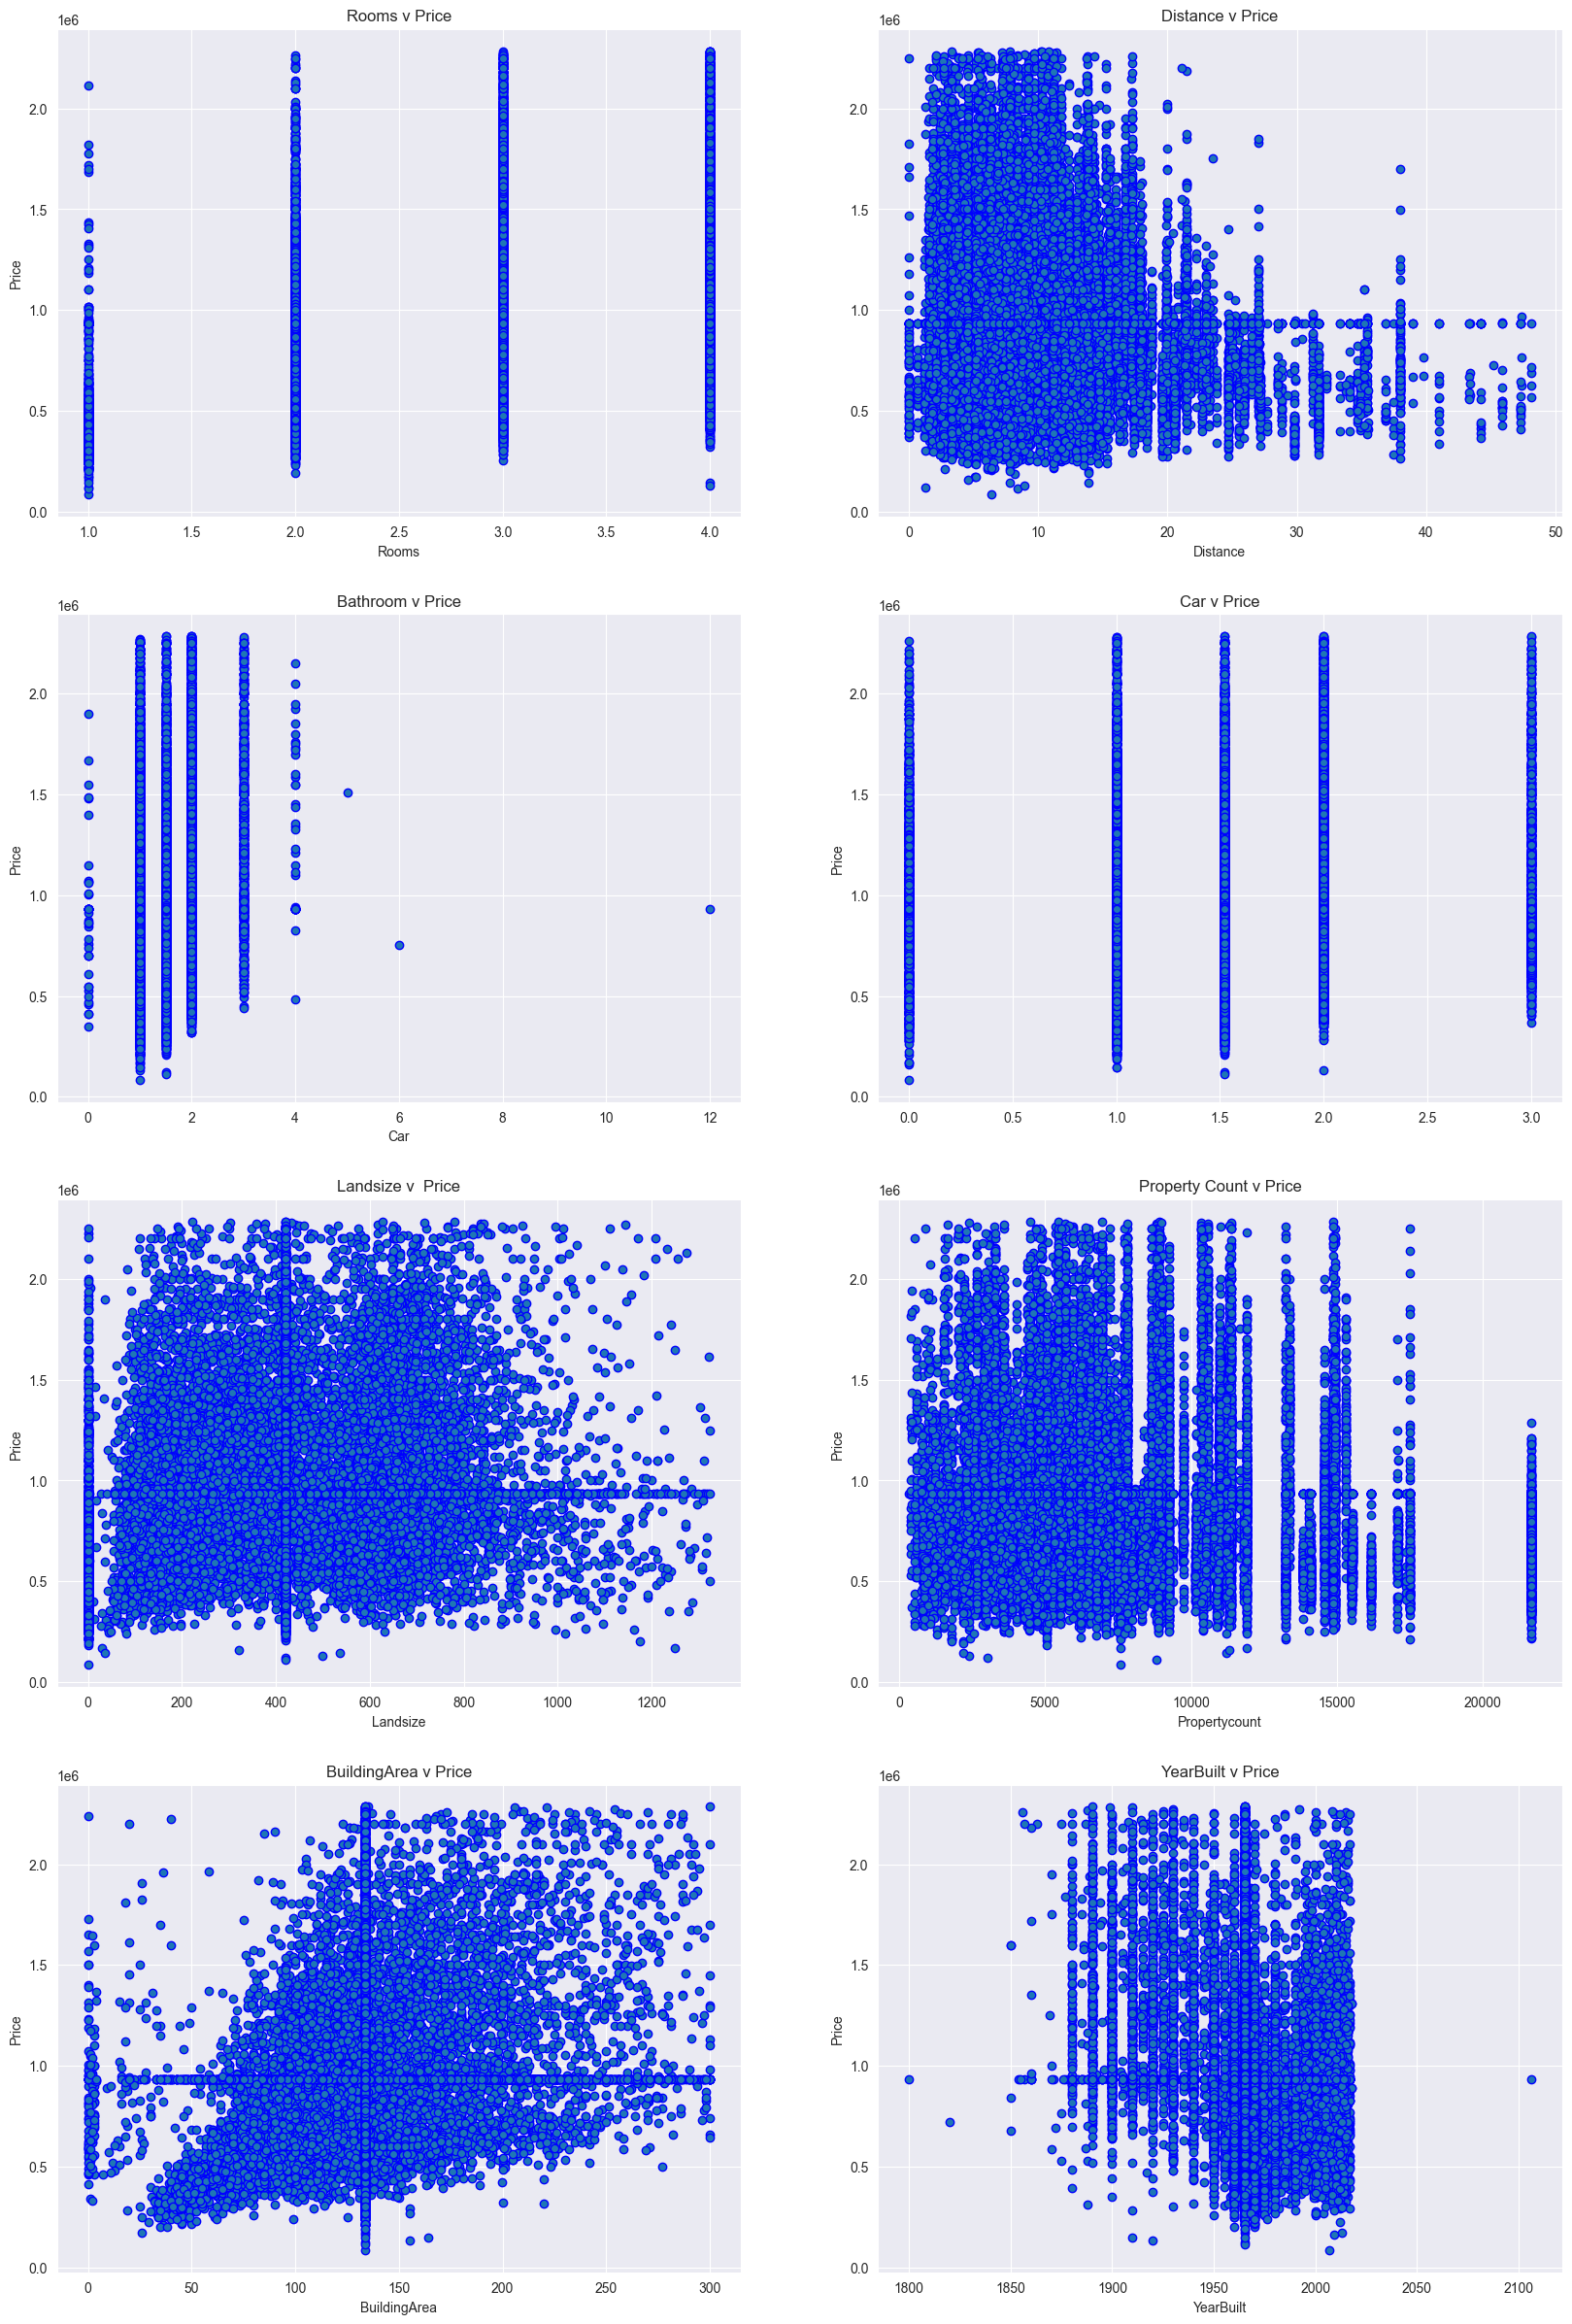

In [836]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = data, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = data, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')
# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = data, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'Propertycount', y = 'Price', data = data, edgecolor = 'b')
axes[2,1].set_xlabel('Propertycount')
axes[2,1].set_ylabel('Price')
axes[2,1].set_title('Property Count v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'BuildingArea', y = 'Price', data = data, edgecolor = 'b')
axes[3,0].set_xlabel('BuildingArea')
axes[3,0].set_ylabel('Price')
axes[3,0].set_title('BuildingArea v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'YearBuilt', y = 'Price', data = data, edgecolor = 'b')
axes[3,1].set_xlabel('YearBuilt')
axes[3,1].set_ylabel('Price')
axes[3,1].set_title('YearBuilt v Price')

# Conclusion 

Above is the new graphes of Price v [Feature]. The values are now much more visable with the removal of outliers however, the substition of all missing data with the mean has also impacted the graphs, resulting in the lines seen above. Regardless I believe the dataset has been greatly improved but more could be done. I think the removal of outliers had the greatest impact during my feature engineering process, making the graphs far more readable